In [58]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
#from PIL import Image


class Visual(object):

    def __init__(self):
        self.cells = []
        self.rows = None
        self.cols = None
        self.agent = (0, 0)
        self.save = {}

    def imshow(self, board):
        
        def bg(i, j):
            x = (j + i%2) % 2
            return x * 10 + 244
        
        size = 1000

        col_obs = [0, 66, 120]
        col_dest = [0, 200, 33]
        if self.rows is None:
            self.rows = board.env_height
            self.cols = board.env_width            
            self.image = np.zeros((self.rows, self.cols, 3), dtype=np.uint8) 
            for ir, r in enumerate(self.image):
                for ic, c in enumerate(r):
                    self.image[ir, ic] = bg(ir, ic)
            for c in board.obstacles:
                self.image[c] = col_obs
                self.save[c] = col_obs
            self.image[board.goal] = col_dest
            self.save[board.goal] = col_dest
        if board.agent:
            old = bg(self.agent[0], self.agent[1])
            if self.agent in self.save:
                old = self.save[self.agent]
            self.image[self.agent] = old
            self.image[board.agent.state[0], board.agent.state[1]] = [255, 40, 0]
            self.agent = tuple(board.agent.state)
         
        display.clear_output(wait=True)
        plt.imshow(self.image, interpolation='none')
        #display.display(plt.gcf())
        plt.pause(1)
        
display.clear_output(wait=True)


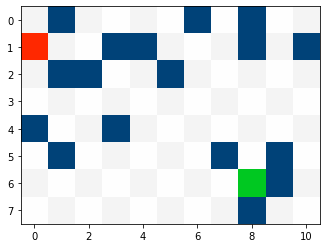

KeyboardInterrupt: 

In [60]:

from main_loop import run_example

vis = Visual()
grid = (8, 11)
episodes=20
run_example(grid, episodes, vis=vis)
